In [1]:
#Referencing https://github.com/Hvass-Labs/FinanceOps/blob/master/01_Forecasting_Long-Term_Stock_Returns.ipynb
import yfinance as yf
import pandas_datareader as pdr
import datetime

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = yf.Ticker("^GSPC").history(period='max')
df = df.reindex(pd.date_range(df.index[0], df.index[-1], freq='D')).interpolate()
df[0] = (df['Close'] / df['Close'].shift(1))
df = df[1:].reset_index()[0].to_frame()

In [5]:
def profit(ret, strat):
    return ret[strat].product() / ret[~strat].product()

In [6]:
s = []
for i in range(100000):
    s.append(profit(df, pd.Series(np.random.randint(0, 2, len(df))).astype('bool'))[0])

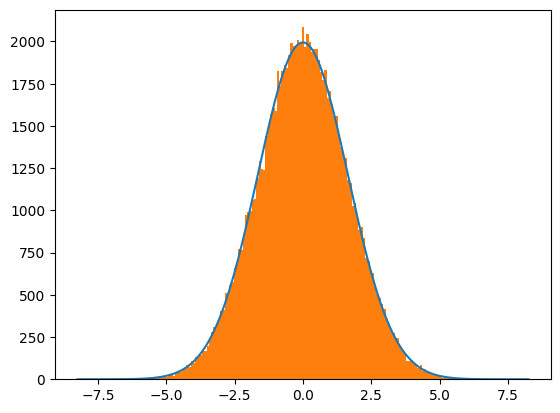

In [47]:
S = np.log(np.array(s))
SS = np.log(np.array(ss))
sy = pd.DataFrame(np.random.normal(S.mean(), S.std(), len(S)))

ran = 5
bins = 200
x = np.linspace(sy.mean() - ran * sy.std(), sy.mean() + ran * sy.std(), bins)[:,0]
peak = (norm.cdf(ran * sy.std()[0] / bins, 0, sy.std()) - 0.5) * 2 * len(S)
plt.plot(x, norm.pdf(x, sy.mean(), sy.std()) * peak / norm.pdf(0, 0, sy.std()))
plt.hist(S, bins=x)
plt.show()

In [77]:
r = []
for i in range(1000):
    r.append(np.log(profit(df, (df[0].cumprod() > df[0].cumprod().shift(i)).shift(1).fillna(True)))[0])

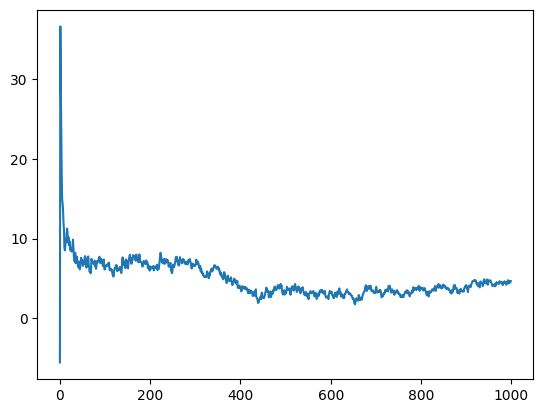

In [79]:
plt.plot(r)